In [1]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import meteostat

In [3]:
#Attempting to get to weather stations as a list: 
import requests

url = 'https://meteostat.p.rapidapi.com/stations/daily'

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '619929cb42dmshf6dd297298e1eddp168b76jsne44e4f04a2f'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)

Error: 403


In [4]:
#Attempting to get to weather stations as DF 
import requests
import pandas as pd

url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '19929cb42dmshf6dd297298e1eddp168b76jsne44e4f04a2f'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-11'
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df

KeyError: 'data'

In [5]:
import os
from dotenv import load_dotenv
import requests

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

# Send request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)

Error: 403


In [6]:
# Import Meteostat library
from meteostat import Stations

# Example usage
latitude = 38.9445
longitude = -77.4558

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)

# Print DataFrame
print(station)

                               name country region    wmo  icao  latitude  \
id                                                                          
72403  Dulles International Airport      US     VA  72403  KIAD   38.9333   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
72403     -77.45       95.0  America/New_York   1973-01-01 2024-05-07   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
72403  1960-04-01 2024-12-30    1961-01-01  2022-01-01  1342.616722  


In [7]:
IAD = Point(38.9445, -77.4558, 95)
BWI = Point(39.1774, -76.6684, 146)
PHL = Point(39.8721, -75.2431, 36)
EWR = Point(40.6895, -74.1745, 18)
JFK = Point(40.6413, -73.7781, 13)
LGA = Point(40.7769, -73.874, 21)

NameError: name 'Point' is not defined

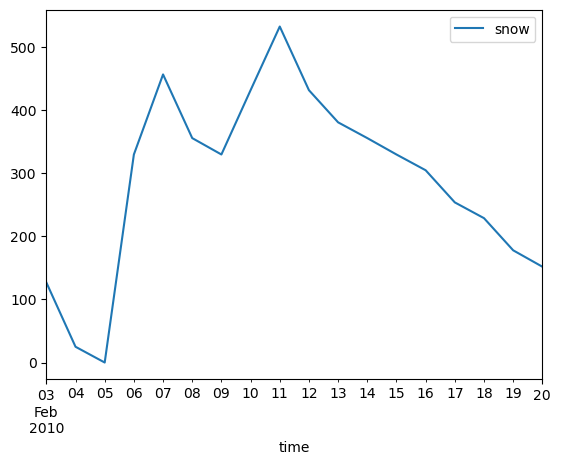

In [8]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 2, 3)
end = datetime(2010, 2, 20)

# Create Point for Vancouver, BC
DCA = Point(38.8521, -77.0377, 0)

# Get daily data for 2018
data = Daily(DCA, start, end)
data = data.fetch()
data
# Plot line chart for snowgit
data.plot(y=['snow'])
plt.show()

In [9]:
#Attempting to get to hourly data 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '19929cb42dmshf6dd297298e1eddp168b76jsne44e4f04a2f'  # Replace {your_api_key} with your actual API key
}

# Retrieve API key from environment variable
#api_key = os.getenv('x-rapid_api_key')

In [10]:
import requests

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Print the JSON data
    print(weather_hourly)
else:
    print("Failed to retrieve data. Status code:", response.status_code)

{'meta': {'generated': '2024-05-08 09:23:25', 'stations': ['72403', 'KJYO0', 'KHEF0', 'KHWY0']}, 'data': [{'time': '2010-02-06 00:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 18.4, 'wpgt': None, 'pres': 1014.4, 'tsun': None, 'coco': None}, {'time': '2010-02-06 01:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.8, 'snow': None, 'wdir': 70.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1012.0, 'tsun': None, 'coco': None}, {'time': '2010-02-06 02:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.3, 'snow': None, 'wdir': 60.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1010.9, 'tsun': None, 'coco': None}, {'time': '2010-02-06 03:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 25.9, 'wpgt': None, 'pres': 1008.8, 'tsun': None, 'coco': None}, {'time': '2010-02-06 04:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.0, 'snow': None, 'wdir': 60.0, 'wspd': 27.7, 'wpgt': None, 'pre

In [11]:
import requests
import pandas as pd

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '619929cb42dmshf6dd297298e1eddp168b76jsne44e4f04a2f'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Check if data is available
    if 'data' in weather_hourly:
        # Normalize the JSON data into a DataFrame
        df = pd.DataFrame(weather_hourly['data'])
        
        # Print the DataFrame
        print(df)
    else:
        print("No data available.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)

Failed to retrieve data. Status code: 403


In [23]:
import requests
import pandas as pd

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-10',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Check if data is available
    if 'data' in weather_hourly:
        # Normalize the JSON data into a DataFrame
        df = pd.json_normalize(weather_hourly['data'])
        
        # Convert time to datetime
        df['time'] = pd.to_datetime(df['time'])
        
        # Round time to nearest 4-hour interval
        df['time'] = df['time'].dt.round('4H')
        
        # Group data by 4-hour intervals and aggregate
        df_agg = df.groupby(pd.Grouper(key='time', freq='4H')).agg({
            'temp': 'mean',  # mean temperature
            'wdir': 'mean',  # mean wind direction
            'wspd': 'mean',   # mean wind speed
            'snow': 'mean'
        }).reset_index()
        
        # Print the aggregated DataFrame
        print(df_agg)
    else:
        print("No data available.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)

                  time       temp        wdir       wspd  snow
0  2010-02-06 00:00:00   0.000000   63.333333  19.800000   NaN
1  2010-02-06 04:00:00  -0.200000   60.000000  29.033333   NaN
2  2010-02-06 08:00:00  -0.800000   96.000000  21.040000   NaN
3  2010-02-06 12:00:00  -1.500000  126.666667  20.400000   NaN
4  2010-02-06 16:00:00  -2.440000  350.000000  23.320000   NaN
5  2010-02-06 20:00:00  -2.966667  353.333333  20.400000   NaN
6  2010-02-07 00:00:00  -5.060000  322.000000   9.040000   NaN
7  2010-02-07 04:00:00  -8.333333  340.000000   6.266667   NaN
8  2010-02-07 08:00:00 -10.100000  324.000000   9.960000   NaN
9  2010-02-07 12:00:00  -8.866667  333.333333  14.800000   NaN
10 2010-02-07 16:00:00  -4.660000  328.000000  17.320000   NaN
11 2010-02-07 20:00:00  -1.666667  300.000000  11.200000   NaN
12 2010-02-08 00:00:00  -4.240000  298.000000   9.680000   NaN
13 2010-02-08 04:00:00  -4.633333  326.666667  13.000000   NaN
14 2010-02-08 08:00:00  -8.020000  302.000000  12.98000

In [24]:
import requests

url = "https://meteostat.p.rapidapi.com/point/hourly"

querystring = {"lat":"38.9445","lon":"-77.4558","start":"2010-02-04","end":"2010-02-10","alt":"113","tz":"America/Toronto"}

headers = {
	"X-RapidAPI-Key": "619929cb4dmshf6dd297298e1eddp168b76jsne44e4f04a2f2",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'meta': {'generated': '2024-05-08 11:07:54', 'stations': ['72403', 'KJYO0', 'KHEF0', 'KHWY0']}, 'data': [{'time': '2010-02-04 00:00:00', 'temp': 2.7, 'dwpt': -4.1, 'rhum': 61.0, 'prcp': 0.0, 'snow': None, 'wdir': 330.0, 'wspd': 11.2, 'wpgt': None, 'pres': 1025.2, 'tsun': None, 'coco': None}, {'time': '2010-02-04 01:00:00', 'temp': 2.1, 'dwpt': -5.8, 'rhum': 56.0, 'prcp': 0.0, 'snow': None, 'wdir': 330.0, 'wspd': 13.0, 'wpgt': None, 'pres': 1025.6, 'tsun': None, 'coco': None}, {'time': '2010-02-04 02:00:00', 'temp': 1.6, 'dwpt': -6.2, 'rhum': 56.0, 'prcp': 0.0, 'snow': None, 'wdir': 330.0, 'wspd': 13.0, 'wpgt': None, 'pres': 1026.3, 'tsun': None, 'coco': None}, {'time': '2010-02-04 03:00:00', 'temp': 1.6, 'dwpt': -6.2, 'rhum': 56.0, 'prcp': 0.0, 'snow': None, 'wdir': 340.0, 'wspd': 13.0, 'wpgt': None, 'pres': 1026.8, 'tsun': None, 'coco': None}, {'time': '2010-02-04 04:00:00', 'temp': 1.0, 'dwpt': -6.8, 'rhum': 56.0, 'prcp': 0.0, 'snow': None, 'wdir': 360.0, 'wspd': 11.2, 'wpgt': None,

In [25]:
df = pd.json_normalize(weather_hourly['data'])
        
        # Convert time to datetime
df['time'] = pd.to_datetime(df['time'])
        
        # Round time to nearest 4-hour interval
df['time'] = df['time'].dt.round('4H')
        
        # Group data by 4-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='4H')).agg({
            'temp': 'mean',  # mean temperature
            'wdir': 'mean',  # mean wind direction
            'wspd': 'mean'   # mean wind speed
        }).reset_index()
        
        # Print the aggregated DataFrame
        
print(df_agg)
 

                  time       temp        wdir       wspd
0  2010-02-06 00:00:00   0.000000   63.333333  19.800000
1  2010-02-06 04:00:00  -0.200000   60.000000  29.033333
2  2010-02-06 08:00:00  -0.800000   96.000000  21.040000
3  2010-02-06 12:00:00  -1.500000  126.666667  20.400000
4  2010-02-06 16:00:00  -2.440000  350.000000  23.320000
5  2010-02-06 20:00:00  -2.966667  353.333333  20.400000
6  2010-02-07 00:00:00  -5.060000  322.000000   9.040000
7  2010-02-07 04:00:00  -8.333333  340.000000   6.266667
8  2010-02-07 08:00:00 -10.100000  324.000000   9.960000
9  2010-02-07 12:00:00  -8.866667  333.333333  14.800000
10 2010-02-07 16:00:00  -4.660000  328.000000  17.320000
11 2010-02-07 20:00:00  -1.666667  300.000000  11.200000
12 2010-02-08 00:00:00  -4.240000  298.000000   9.680000
13 2010-02-08 04:00:00  -4.633333  326.666667  13.000000
14 2010-02-08 08:00:00  -8.020000  302.000000  12.980000
15 2010-02-08 12:00:00  -7.966667  330.000000   6.133333
16 2010-02-08 16:00:00  -3.3200

KeyError: 'prcp'

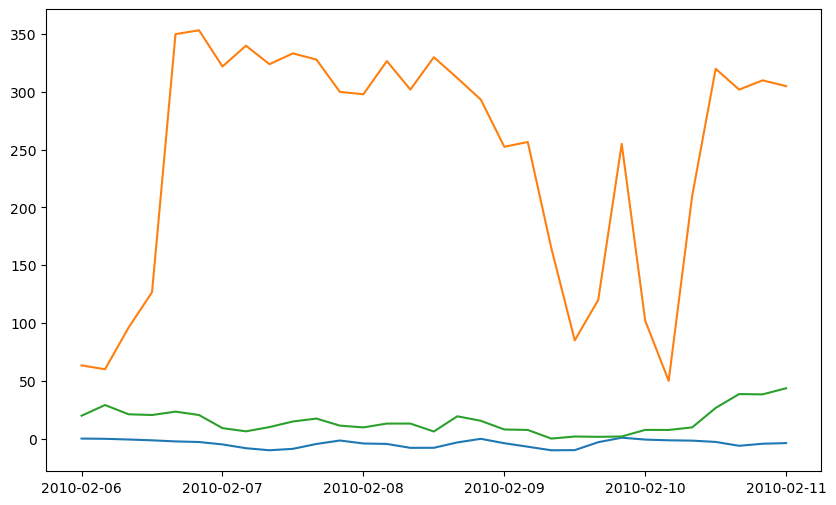

In [26]:
import matplotlib.pyplot as plt

# Assuming df_agg DataFrame is already calculated

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean temperature
plt.plot(df_agg['time'], df_agg['temp'], label='Mean Temperature')

# Plot mean wind direction
plt.plot(df_agg['time'], df_agg['wdir'], label='Mean Wind Direction')

# Plot mean wind speed
plt.plot(df_agg['time'], df_agg['wspd'], label='Mean Wind Speed')
# Plot mean wind speed
plt.plot(df_agg['prcp'], df_agg['wdir'], label='Mean Wind Direction')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Mean Temperature, Wind Direction, and Wind Speed')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [27]:
# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-05',
    'end': '2010-02-17',
}
# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'
# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '619929cb42dmshf6dd297298e1eddp168b76jsne44e4f04a2f'
}
# Make the API request
response = requests.get(url, headers=headers, params=parameters)
# Extract JSON data from the response
weather_hourly = response.json()
# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])
# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])
# Round time to nearest 6-hour interval
df['time'] = df['time'].dt.round('12H')
# Group data by 12-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'snow': 'mean',  # mean temperature
    #'wspd': 'mean'   # mean wind speed
}).reset_index()
# Print the aggregated DataFrame
weather_iad_hourly = pd.DataFrame(df_agg)
weather_iad_hourly

KeyError: 'data'

In [28]:
# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])
# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])
# Round time to nearest 6-hour interval
df['time'] = df['time'].dt.round('12H')
# Group data by 12-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'snow': 'mean',  # mean temperature
    #'wspd': 'mean'   # mean wind speed
}).reset_index()
# Print the aggregated DataFrame
weather_iad_hourly = pd.DataFrame(df_agg)
weather_iad_hourly

KeyError: 'data'

In [ ]:
table_name_sql = f'SELECT count(*) 
                    FROM {schema}.{table_name}
                    '
engine.execute(table_name_sql).fetchall()[0][0] == df_selected_airports.shape[0]